## <h3 align="center"> __Johns Hopkins University__</h3>
## <h3 align="center">__Whiting School of Engineering__</h3>
## <h3 align="center">__Engineering for Professionals__</h3>
## <h3 align="center">__685.621 Algorithms for Data Science__</h3>
## <h3 align="center">__Homework 5__</h3>
## <h3 align="center">__Assigned at the start of Module 12__</h3>
## <h3 align="center">__Due at the end of Module 13__</h3><br>
## <h3 align="center">__Total Points 100/100__</h3>
Class, the below is a standard set of instructions for each HW, in this assignment groups will be set up for collaboration.<br><br>
Make sure your group starts one thread for the collaborative problems. You are required to participate in the collaborative problem and subproblem separately. Please do not directly post a complete
solution, the goal is for the group to develop a solution after everyone has participated. Please ensure
you have a write-up with solutions to each problem and subproblems, you are also required to submit
code that will be compiled when grading the assignment. In each of the problems you are allowed to
use built-in functions.

# __1 - Module 13 Note this is Collaborative Problem - Note: create threads for both subparts, you are required to participate in both subparts.__<br>
*30 Points Total*<br><br>
In this problem you will use a built-in Convolutional Neural Network (CNN) using either the Iris or numerical (MNIST) data sets and show the classification accuracy:<br><br>


In [57]:
# load libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split


# load dataset
df_mnist = pd.read_csv("mnist.csv")

mnist_train, mnist_test = train_test_split(df_mnist.values, test_size=0.2, random_state=1)
mnist_train_ = mnist_train[:,1:]
mnist_test_ = mnist_test[:,1:]
mnist_train_labels = mnist_train[:,0]
mnist_test_labels = mnist_test[:,0]
mnist_train_, mnist_test_ = mnist_train_ / 255.0, mnist_test_ / 255.0

mnist_train_ = np.reshape(mnist_train_, (-1,28,28))
mnist_test_ = np.reshape(mnist_test_, (-1,28,28))

In [58]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

/Users/zachhatzenbeller/Documents/GitHub/Data-Science-Masters/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
## Type the code for part 2 here ##
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(
    mnist_train_, mnist_train_labels, epochs=10, 
    validation_data=(mnist_test_, mnist_test_labels)
)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8483 - loss: 0.4602 - val_accuracy: 0.9817 - val_loss: 0.0638
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9812 - loss: 0.0597 - val_accuracy: 0.9848 - val_loss: 0.0503
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9894 - loss: 0.0380 - val_accuracy: 0.9867 - val_loss: 0.0523
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9903 - loss: 0.0288 - val_accuracy: 0.9858 - val_loss: 0.0502
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9910 - loss: 0.0242 - val_accuracy: 0.9860 - val_loss: 0.0497
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9944 - loss: 0.0178 - val_accuracy: 0.9844 - val_loss: 0.0617
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9950 - loss: 0.0152 - val_accuracy: 0.9868 - val_loss: 0.0539
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9959 - loss: 0.0123 - 

In [55]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 279,968 (1.07 MB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)

263/263 - 1s - 2ms/step - accuracy: 0.9843 - loss: 0.0654


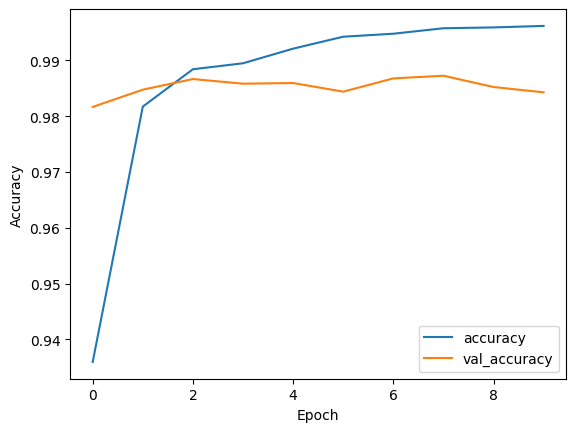

In [60]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(mnist_test_,  mnist_test_labels, verbose=2)

# 2 - Module 12 Optimization - Note this is a Collaborative Problem<br>
70 points total

In this problem, you will develop the Support Vector Machine (SVM) algorithm from scratch to classify the Iris data set.

1. [15 points] Using the SVM in the Optimization course notes, develop psuedocode for an SVM classifier using a linear and separately an rbf kernel.<br><br>
2. [Optional] no need to discuss collaboratively - Analyze the runtime of your design in big O notation and calculate a total runtime such that each line of psuedocode is accounted for.<br><br>
3. [55 points] Implement your SVM using Python:<br><br>
    - Train three two class models using the Iris dataset as input training data, the Iris data will need to be reconfigured as a one vs. all or one vs. one data set.
    - Process the test data set to determine which class each test observation belongs to, in this problem you will simply use all 150 observations as your test data.
    - What is the classification accuracy of your design?
    - Is there a difference in performance between the two kernels? Why do you think that is?

### Part 1

- Algorithm: SVM_Linear
- Input: Training data (X, y), regularization parameter C
- Output: Model parameters (w, b)

1. Initialize weights w and bias b to zero (or small random values)
2. Choose a linear kernel function K(u, v) = u · v
3. For each iteration:
   a. For each training example (xi, yi) in (X, y):
      i. Compute the decision value: f(xi) = w · xi + b
      ii. If yi * f(xi) < 1:
         - Update w = w + eta * (yi * xi - 2 * lambda * w)
         - Update b = b + eta * yi
      where eta is the learning rate and lambda = 1 / (C * n_samples)
4. Continue until convergence or maximum iterations are reached
5. Return w, b


- Algorithm: SVM_RBF
- Input: Training data (X, y), regularization parameter C, kernel parameter gamma
- Output: Support vectors, coefficients, and intercept

1. Initialize alpha (Lagrange multipliers) to zero
2. Choose an RBF kernel function K(u, v) = exp(-gamma * ||u - v||^2)
3. For each iteration:
   a. For each training example (xi, yi) in (X, y):
      i. Compute the decision value: f(xi) = sum(alpha_j * yj * K(xj, xi)) + b for all j
      ii. If yi * f(xi) < 1:
         - Update alpha_i = alpha_i + eta * (1 - yi * f(xi))
4. Clip alpha_i to [0, C] for all i
5. Compute b using support vectors (those with 0 < alpha_i < C)
   b = average(yi - sum(alpha_j * yj * K(xj, xi)) for i such that 0 < alpha_i < C)
6. Continue until convergence or maximum iterations are reached
7. Return the set of support vectors, their corresponding alpha values, and b


### Part 2

### 1. **SVM Classifier Using a Linear Kernel**
- **Time Complexity**: \(O(T \cdot n \cdot d)\)
  - **Where**:
    - \(T\) = Number of iterations to convergence
    - \(n\) = Number of training samples
    - \(d\) = Number of features per sample

### 2. **SVM Classifier Using an RBF Kernel**
- **Time Complexity**: \(O(T \cdot n^2 \cdot d)\)
  - **Where**:
    - \(T\) = Number of iterations to convergence
    - \(n\) = Number of training samples
    - \(d\) = Number of features per sample

**Summary**:
- The linear kernel SVM scales linearly with the number of samples and features, while the RBF kernel SVM scales quadratically with the number of samples due to the need to compute the kernel for every pair of samples.

### Part 3

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

class SVM:
    # Basic initialization function
    def __init__(self, lr = 0.001, lambda_param = 0.01, gamma = 0.1, n_iter = 1000):
        self.lr = lr
        self.lambda_param = lambda_param
        self.gamma = gamma
        self.n_iter = n_iter
        self.w = None
        self.b = None

    # Function to initialize the weight vector and the bias term with random small values
    def initialize_weights(self, X):
        n_features = X.shape[1]
        self.w = np.random.rand(n_features)
        self.b = 0

    def kernels(self, X, classifier="linear"):
        n_samples = X.shape[0]
        K = np.zeros((n_samples, n_samples))
        
        if classifier == "linear":
            for i in range(n_samples):
                K[i, :] = np.dot(X, self.w)
            # predict the label for a new data point assuming a linear function
        elif classifier == "rbf":
            for i in range(n_samples):
                K[i, :] = np.exp(-self.gamma * np.linalg.norm(X - self.w)**2)
        else:
            raise ValueError("Please provide a valid classifier!")
        return K

    # Function to label the class of each sample as 1 or -1
    def get_label(self, y, label):
        y_ = np.where(y==label, -1, 1)
        return y_
    
    # Fit function to train from data using gradient descent
    def fit(self, X, y, label, classifier):
        self.initialize_weights(X)
        labels = self.get_label(y, label)
        K = self.kernels(X, classifier)

        for _ in range(self.n_iter):
            for idx, xi in enumerate(X):
                condition = labels[idx]*(np.dot(xi,self.w) + self.b) >=1
                if condition:
                    self.w -= self.lr*(2*self.lambda_param*self.w)
                else:
                    self.w -= self.lr*(2*self.lambda_param*self.w - np.dot(xi,labels[idx]).astype("float"))
                    self.b -= self.lr*labels[idx]
        self.X_train = X

    # Predict function to perform classification over new data points
    def predict(self, X, classifier="linear"):
        if classifier == "linear":
            # predict the label for a new data point assuming a linear function
            pred = np.dot(X, self.w) + self.b
        elif classifier == "rbf":
            pred = np.exp(-self.gamma * np.linalg.norm(X - self.w)**2) + self.b
        else:
            raise ValueError("Please provide a valid classifier!")
        
        return np.sign(pred)
    
    def accuracy(self, y_true, y_pred, label):
        true_labels = self.get_label(y_true, label)
        accuracy = np.sum(true_labels == y_pred) / len(true_labels)
        return accuracy*100

In [51]:
# Load data
df_iris = pd.read_csv("iris.csv")
X = df_iris.values[:,:4]
y = df_iris.values[:,4]

classes = ["setosa","virginica","versicolor"]
classifiers = ["linear", "rbf"]
print("")
for i in classes:
    print(f"Class: {i}")
    for j in classifiers:
        class_ = i
        classifier = j

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        clf = SVM()
        clf.fit(X_train, y_train, label=class_, classifier=j)
        predictions = clf.predict(X, classifier=classifier)
        print(f"Kernel: {j}, SVM Accuracy: {clf.accuracy(y, predictions,label=class_)}")
    print("")


Class: setosa
Kernel: linear, SVM Accuracy: 100.0
Kernel: rbf, SVM Accuracy: 66.66666666666666

Class: virginica
Kernel: linear, SVM Accuracy: 92.0
Kernel: rbf, SVM Accuracy: 33.33333333333333

Class: versicolor
Kernel: linear, SVM Accuracy: 63.33333333333333
Kernel: rbf, SVM Accuracy: 66.66666666666666



### Analysis
- What is the classification accuracy of your design?
  - The accuracy is shown above for each class with each kernel. The setosa performs the best with both kernels
  - The accuracy for the rbf kernel is most likely inaccurate based on some other student's results but I am not able to find the issue with my code
  - The accuracy for the other two classes decreases. Virginica does well with the linear kernel but very poorly with the rbf kernel.
  - Versicolor does poorly with both kernels but better than Virginica using the rbf kernel. I hope to troubleshoot this more so that I can fully grasp this concept and find the error in my code.
- Is there a difference in performance between the two kernels? Why do you think that is?
  - There is a difference in performance. My implementation shows the linear kernel outperforming the rbf kernel. In practice this is generally the opposite with the rbf doing much better. I would suspect for the iris dataset, classification should be fairly easy even with a basic linear kernel since the classes separate pretty well already. The rbf kernel should work better in general since it is more powerful and has the ability to separate based on the radius of the classes spread of data compared to a simple line that differentiates classes.

## References<br><br>
[1] Charu C. Aggarwal, Neural Networks and Deep Learning, Springer 2018<br><br>
[2] Ahmad Abdolsaheb, How to make your Tic Tac Toe game unbeatable by using the minimax algorithm,
2020, https://www.freecodecamp.org/news/how-to-make-your-tic-tac-toe-game-unbeatable-byusing-
the-minimax-algorithm-9d690bad4b37/<br><br>
[3] Francois Chollet, Deep Learning with Python, Manning, 2018<br><br>
[4] Stephen Cook, The Complexity of Theorem Proving Procedures, Proceedings of the third annual ACM symposium<br><br>
on Theory of computing, pp. 151-158, 1971
[5] Ian Goodfellow, Yoshua Bengio and Aaron Courville, Deep Learning, MIT Press, 2016,
https://www.deeplearningbook.org/<br><br>
[6] Patric Honner (Contributing Columnist), Why Winning in Rock-Paper-Scissors (and in Life) Isn’t Everything,
What does John Nash’s game theory equilibrium concept look like in Rock-Paper-Scissors?, an article in the
online Quanta Magazine, April 2, 2018, https://www.quantamagazine.org/the-game-theory-math-behindrock-
paper-scissors-20180402/<br><br>
[7] Richard M. Karp, Reducibility Among Combinatorial Problems, In R. E. Miller and J. W. Thatcher (editors),
Complexity of Computer Computations, New York: Plenum, pp. 85-103, 1972<br><br>
[8] Stephen G. Nash and Ariela Sofer, Linear and Nonlinear Programming, McGraw-Hill, 1996<br><br>
[9] Stuart Russell and Peter Norvig, Arti cial Intelligence a Modern Approach Fourth Edition, Pearson, 2020<br><br>
[10] Sergios Theodoridis and Konstantinos Koutroumbas, Pattern Recognition Third Edition, San Diego, CA:
Academic Press, 2006<br><br>
[11] Thomas H. Cormen, Charles E. Leiserson, Ronal L. Rivest and Cli ord Stein, Introduction to Algorithms,
3rd Edition, MIT Press, 2009<br><br>
[12] David Zuckerman, NP-Complete Problems Have a Version That’s Hard to Approximate, IEEE, Proceedings
of the Eighth Annual Structure in Complexity Theory Conference, pp. 305-312, 1993<br><br>
[13] David Zuckerman, On Unapproximable Versions of NP-Complete Problems, SIAM Journal on Computing,
Volume 25, Issue 6, pp. 1293-1304, 1996